# Imports / Dependencies

In [58]:
import pandas as pd
from pandas import DataFrame # this helps stay organized
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime as dt
from sklearn.linear_model import LinearRegression

## Gather Data

In [59]:
# store our data in an object
data = pd.read_csv('NVDA_data.csv')
type(data)

pandas.core.frame.DataFrame

In [60]:
# we must see how the data is structured on the csv file
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/22/1999,1.750000,1.953125,1.552083,1.640625,1.513616,67867200
1,1/25/1999,1.770833,1.833333,1.640625,1.812500,1.672185,12762000
2,1/26/1999,1.833333,1.869792,1.645833,1.671875,1.542447,8580000
3,1/27/1999,1.677083,1.718750,1.583333,1.666667,1.537642,6109200
4,1/28/1999,1.666667,1.677083,1.651042,1.661458,1.532837,5688000


In [61]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5132,6/17/2019,144.570007,146.520004,143.649994,145.029999,145.029999,6901000
5133,6/18/2019,147.500000,155.110001,147.059998,152.880005,152.880005,14548000
5134,6/19/2019,154.300003,154.759995,152.070007,153.119995,153.119995,8291100
5135,6/20/2019,156.770004,157.330002,153.520004,154.100006,154.100006,8754200
5136,6/21/2019,153.500000,155.479996,151.500000,151.759995,151.759995,10853100


In [62]:
data.count()

Date         5137
Open         5137
High         5137
Low          5137
Close        5137
Adj Close    5137
Volume       5137
dtype: int64

## Cleaning data - check for missing values

In [63]:
# check to see any missing values in the our dataset
pd.isnull(data).any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 7 columns):
Date         5137 non-null object
Open         5137 non-null float64
High         5137 non-null float64
Low          5137 non-null float64
Close        5137 non-null float64
Adj Close    5137 non-null float64
Volume       5137 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 281.0+ KB


## Data Visualization

In [65]:
# we must save the data from the date section
list_dates = data['Date'] # store date row in list

In [66]:
# prepare charts for linear regression
# we must seperate features from our target
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in list_dates]
y = DataFrame(data, columns=['Open'])
data['Date'] = pd.to_datetime(data.Date, format = '%m/%d/%Y')
data.index = data['Date']

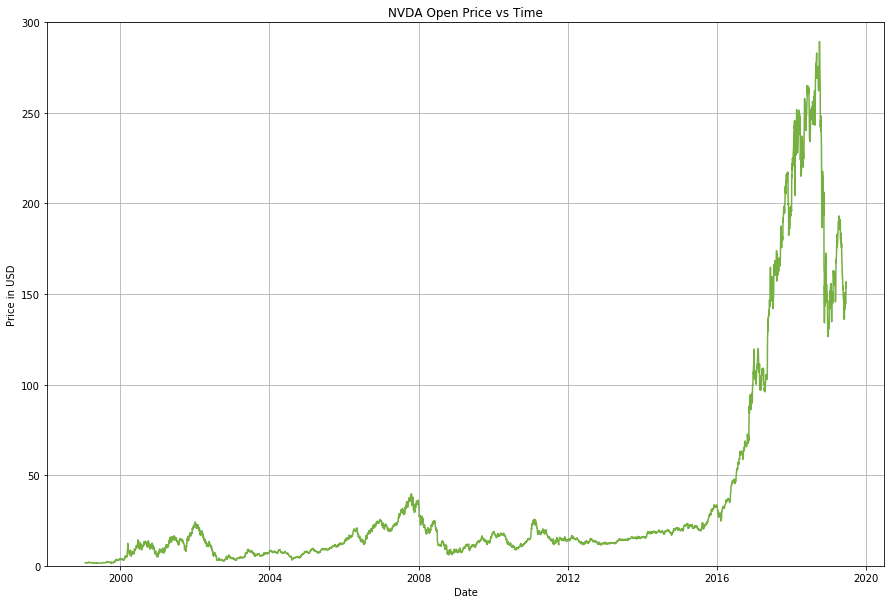

In [67]:
# create a chart of NVDA stock price throghout time
plt.figure(figsize=(15,10)) # adjust size of plot
plt.plot(data['Open'], label = 'Open Price',color='#76b041')
plt.grid(True)
#plt.scatter(x,y,alpha=0.3) # this will plot the data points
plt.title('NVDA Open Price vs Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.ylim(0,300) # change the vlue of our range with resp to y
plt.show()

## Linear Regression